## 1.1. Problem Statement

The **Titanic dataset** contains data about passengers aboard the RMS Titanic, which sank during its maiden voyage in 1912 after colliding with an iceberg. The tragedy resulted in significant loss of life, and this dataset captures a range of information about the passengers, including demographics, ticket details, and whether or not they survived.

The goal of this analysis is to explore the factors that may have influenced survival chances, and to uncover insights that can later be used to build predictive models.

---

## 1.2. Objective of the Analysis

The main objectives of this Exploratory Data Analysis (EDA) are:

- To understand the structure and nature of the Titanic dataset.
- To analyze the **distribution of survival outcomes** (target variable).
- To examine **relationships between features** (e.g., gender, age, class) and survival.
- To identify and handle **missing values**, **outliers**, and **imbalances** in the data.
- To provide a strong foundation for feature selection and predictive modeling (e.g., classification).

This analysis will help uncover patterns and correlations between the input features and the likelihood of survival.

---

## 1.3. Dataset Description

The Titanic dataset is a well-known, real-world dataset included with the Seaborn library. It consists of information for **891 passengers**, with the following commonly used features:

| Column Name     | Description                                                  | Data Type    |
|----------------|--------------------------------------------------------------|--------------|
| `survived`     | Survival (0 = No, 1 = Yes)                                    | Categorical (binary) |
| `pclass`       | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                       | Ordinal      |
| `sex`          | Gender of the passenger                                       | Categorical  |
| `age`          | Age of the passenger in years                                 | Continuous   |
| `sibsp`        | Number of siblings/spouses aboard                             | Discrete     |
| `parch`        | Number of parents/children aboard                             | Discrete     |
| `fare`         | Passenger fare                                                | Continuous   |
| `embarked`     | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | Categorical  |
| `class`        | Passenger class (alternative to `pclass`)                     | Categorical  |
| `who`          | man, woman, or child                                          | Categorical  |
| `deck`         | Deck location (A–G)                                            | Categorical (many missing) |
| `embark_town`  | Full name of embarkation town                                 | Categorical  |
| `alive`        | Survival status (yes/no)                                      | Categorical  |
| `alone`        | Whether the passenger was alone                               | Boolean      |


### 2. Data Loading and Setup

In [3]:
## 2.1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')
plt.style.use('ggplot')


In [4]:
# 2. Load the Dataset
df = sns.load_dataset('titanic')

# Quick look
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# A function for stylish view
def print_section(title):
    print("\n" + "=" * len(title))
    print(title)
    print("=" * len(title) + "\n")

### 3. Understand the Dataset Structure

In [7]:
## 3.1. Display Basic Information
print_section('Shape of the dataset')
print("Shape:", df.shape)
print_section('Basic info:')
df.info()


Shape of the dataset

Shape: (891, 15)

Basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# 3.2. Summary Statistics
# Numerical columns
print_section('Statistics of Numerical columns')
print(df.describe())

# Categorical columns
print_section('Statistics of Categorical columns')
print(df.describe(include='object'))

print_section('Number of unique values in features:')
print(df.nunique())


Statistics of Numerical columns

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Statistics of Categorical columns

         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          644   54

### 4. Target Variable Analysis


Class distribution on counts:

survived
0    549
1    342
Name: count, dtype: int64

Class distribution on percentage:

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


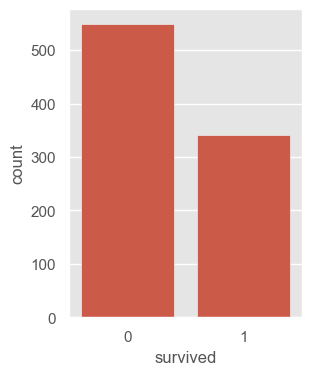

In [10]:
# Check class distribution (counts and proportions) to assess balance
print_section('Class distribution on counts:')
print(df['survived'].value_counts())
print_section('Class distribution on percentage:')
print(df['survived'].value_counts(normalize=True)*100)

# Graphical representation
fig = plt.figure(figsize=(3,4))
sns.countplot(data=df, x='survived')
plt.show()

### 5. Data Cleaning

In [12]:
## 5.1. Handling Duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 107


In [13]:
## Remove the duplicates
df.drop_duplicates(inplace=True)

In [14]:
## 5.2. Handling Missing Values
# Check again for nulls
print(df.isnull().sum())

# Fill age with median
df['age'] = df['age'].fillna(df['age'].median())

# Drop 'deck' column (too many NaNs)
df.drop(columns='deck', inplace=True)

# Drop remaining NaNs (for simplicity here)
df.dropna(inplace=True)

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64


In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


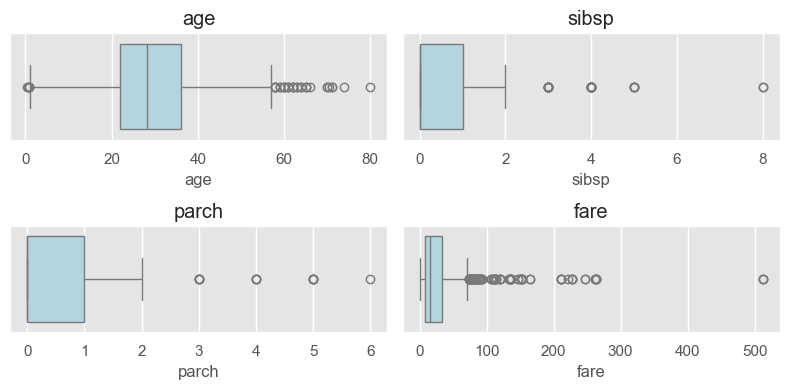

In [16]:
## 5.3. Handling Outliers of Continuous Features

numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['survived','pclass'])
plt.figure(figsize=(8,4))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### 6. Univariate Analysis (Single Variable)

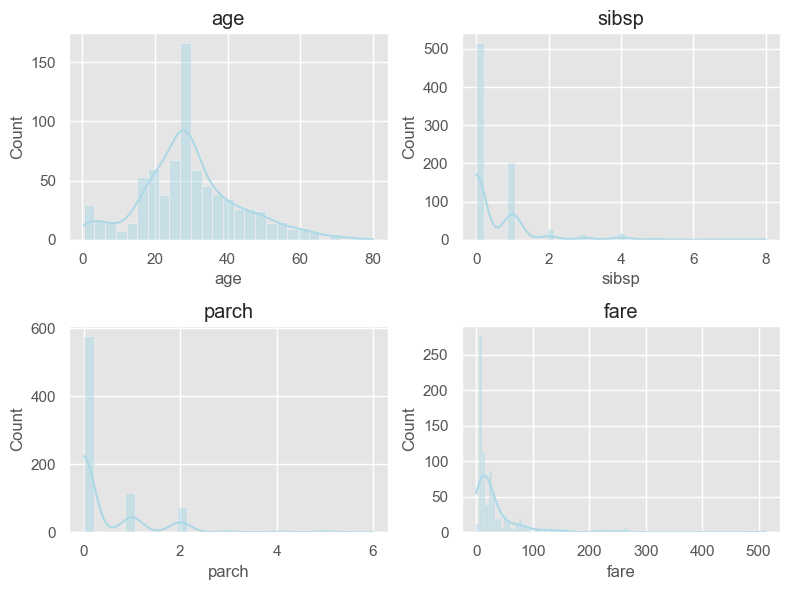

In [18]:
## 6.1. Numerical Variables

numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['survived','pclass'])
plt.figure(figsize=(8,6))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[col], color='lightblue', kde=True)
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [19]:
## 6.2. Categorical Variables
# cat_df = df.select_dtypes(include='object').drop(columns=['CarName'])
# plt.figure(figsize=(15,10))
# for i, col in enumerate(cat_df.columns):
#     plt.subplot(3,3,i+1)
#     sns.countplot(data=cat_df, x=col)
#     plt.title(f'Count plot of {col}')
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### 7. Bivariate and Multivariate Analysis

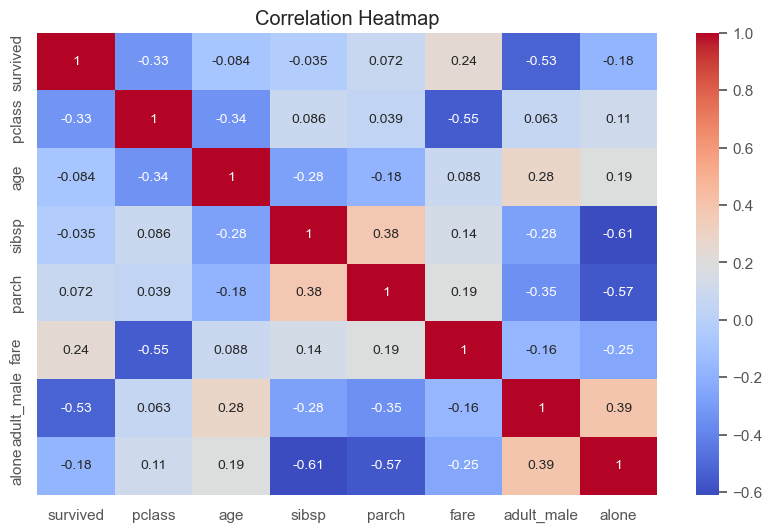

In [21]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

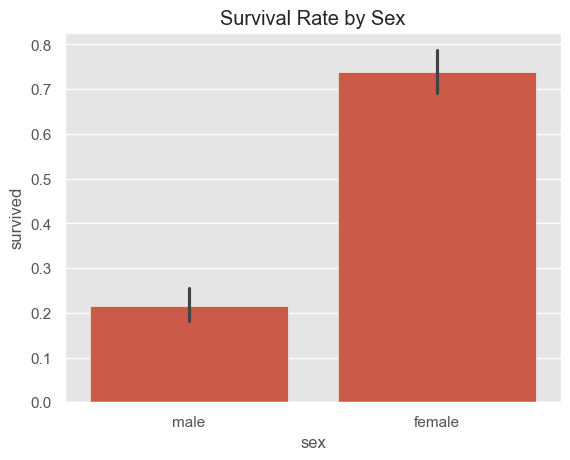

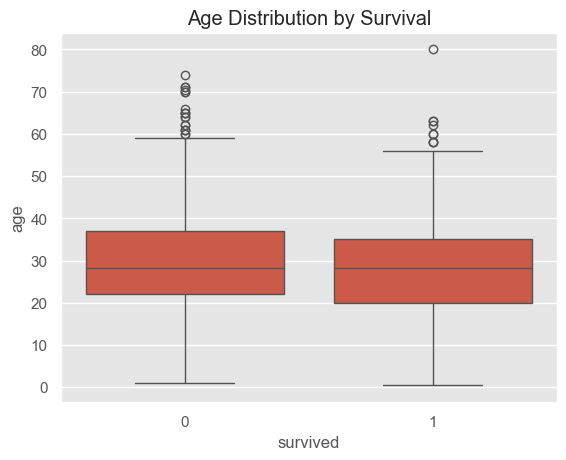

In [22]:
# Survival rate by sex
sns.barplot(data=df, x='sex', y='survived')
plt.title("Survival Rate by Sex")
plt.show()

# Age vs survival
sns.boxplot(data=df, x='survived', y='age')
plt.title("Age Distribution by Survival")
plt.show()


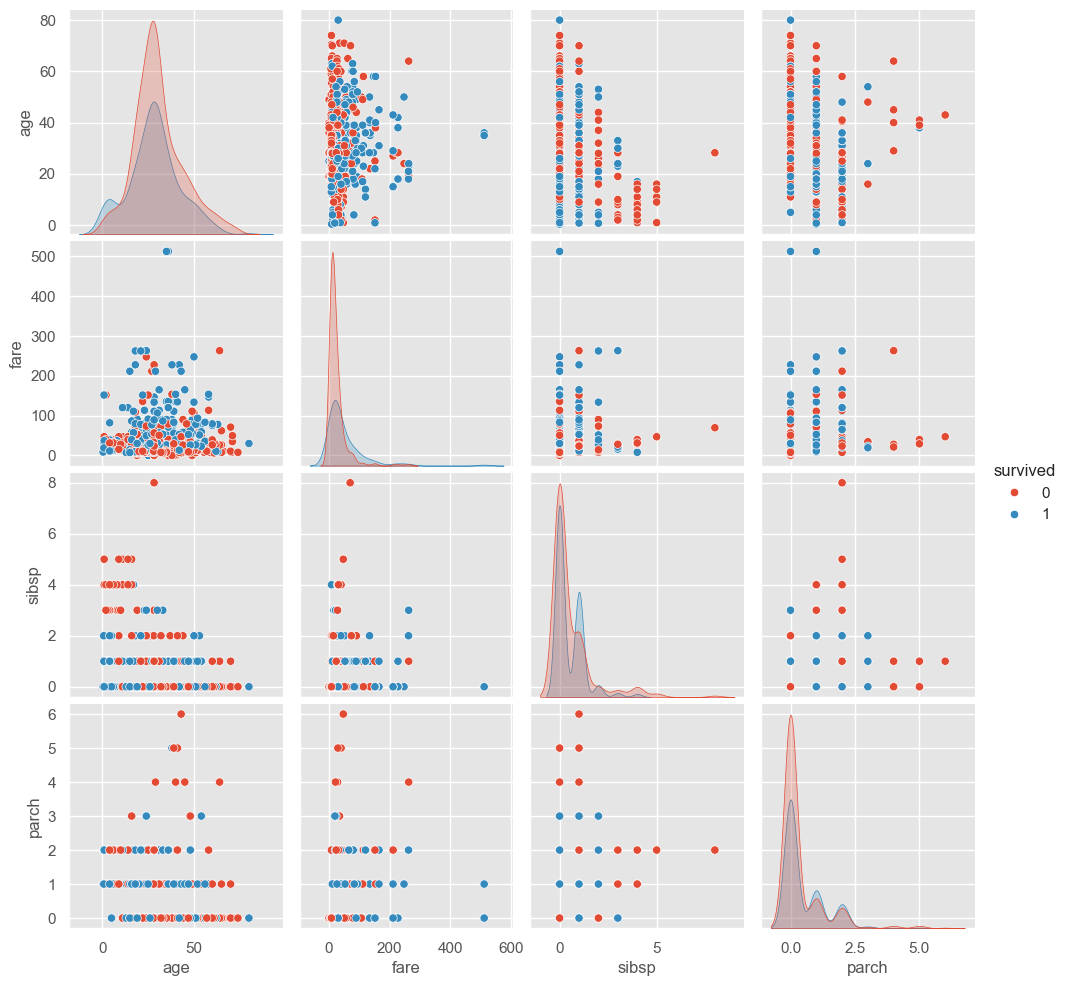

In [23]:
sns.pairplot(df[['survived', 'age', 'fare', 'sibsp', 'parch']], hue='survived')
plt.show()
# It is not very useful for titanic dataset. It is for reference only.

### 7. Feature Engineering

In [25]:
# Create new feature: family_size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Encode categorical: sex
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})

### 8. Statistical Summary & Insights

In [27]:
# 9. Final Cleaned Dataset Overview
print_section("9. Final Cleaned Dataset Overview")
print(df.head())
print_section("Basic info about the Dataset")
print(df.info())
print_section("Description of the Numerical Data")
print(df.describe())


9. Final Cleaned Dataset Overview

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  family_size  sex_encoded  
0    man        True  Southampton    no  False            2            0  
1  woman       False    Cherbourg   yes  False            2            1  
2  woman       False  Southampton   yes   True            1            1  
3  woman       False  Southampton   yes  False            2            1  
4    man        True  Southampton    no   True            1            0  

Basic info about the Dataset

<class 'pandas.core.frame.